# Imports

In [ ]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

from time import time
from Utilities import *


# Load the data

In [ ]:
train_data = np.load('CIFAKE_Train.npz')
test_data = np.load('CIFAKE_Test.npz')

In [ ]:
images_train = train_data['images']
labels_train = train_data['labels']

images_test = test_data['images']
labels_test = test_data['labels']

label_names = train_data['label_names']

images_train.shape

(100000, 32, 32, 3)

Let's take a quick look at some of the images

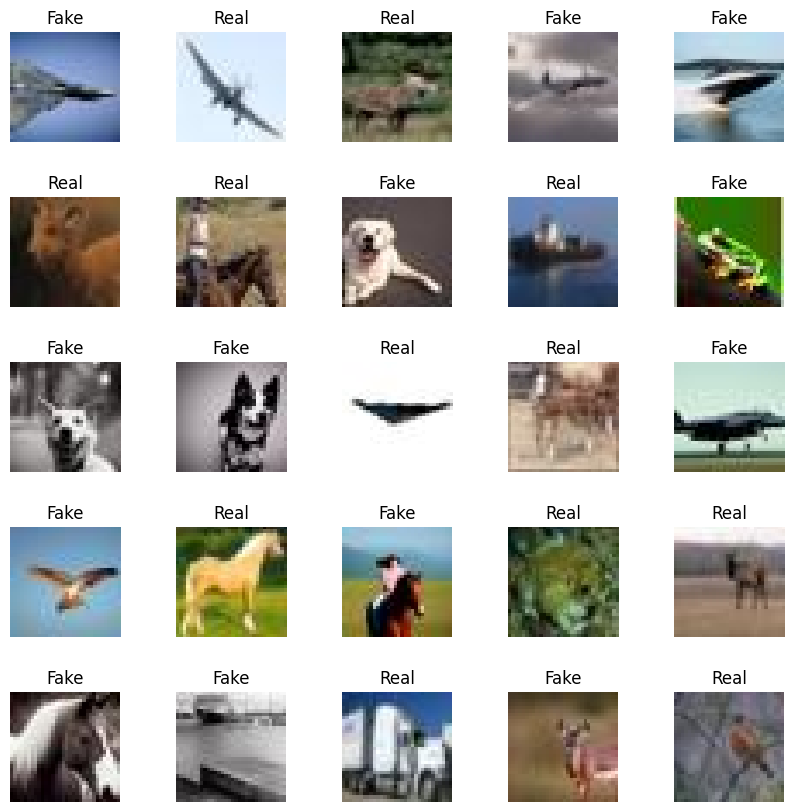

In [ ]:
PlotImages(0, 25, 5, 5, images_train, labels_train, label_names)

# Flatten the image data

In [ ]:
m_train = images_train.shape[0]
X_train = images_train.reshape(m_train, 32 * 32 * 3)
y_train = labels_train

m_test = images_test.shape[0]
X_test = images_test.reshape(m_test, 32 * 32 * 3)
y_test = labels_test

X_train.shape

(100000, 3072)

# Data Normalization
We used normalization instead of standardization since our pixel data has a fixed range

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train.min(), X_train.max()

(0.0, 1.0)


# Logistic Regression

In [ ]:
lgr = LogisticRegression(n_jobs=-1, max_iter=1000)

In [ ]:
lgr.fit(X_train, y_train)

print('training score', lgr.score(X_train, y_train))
print('testing score', lgr.score(X_test, y_test))


training score 0.70086
testing score 0.6882
